In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cv2
import os

from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

from PIL import Image

sns.set_style('darkgrid')

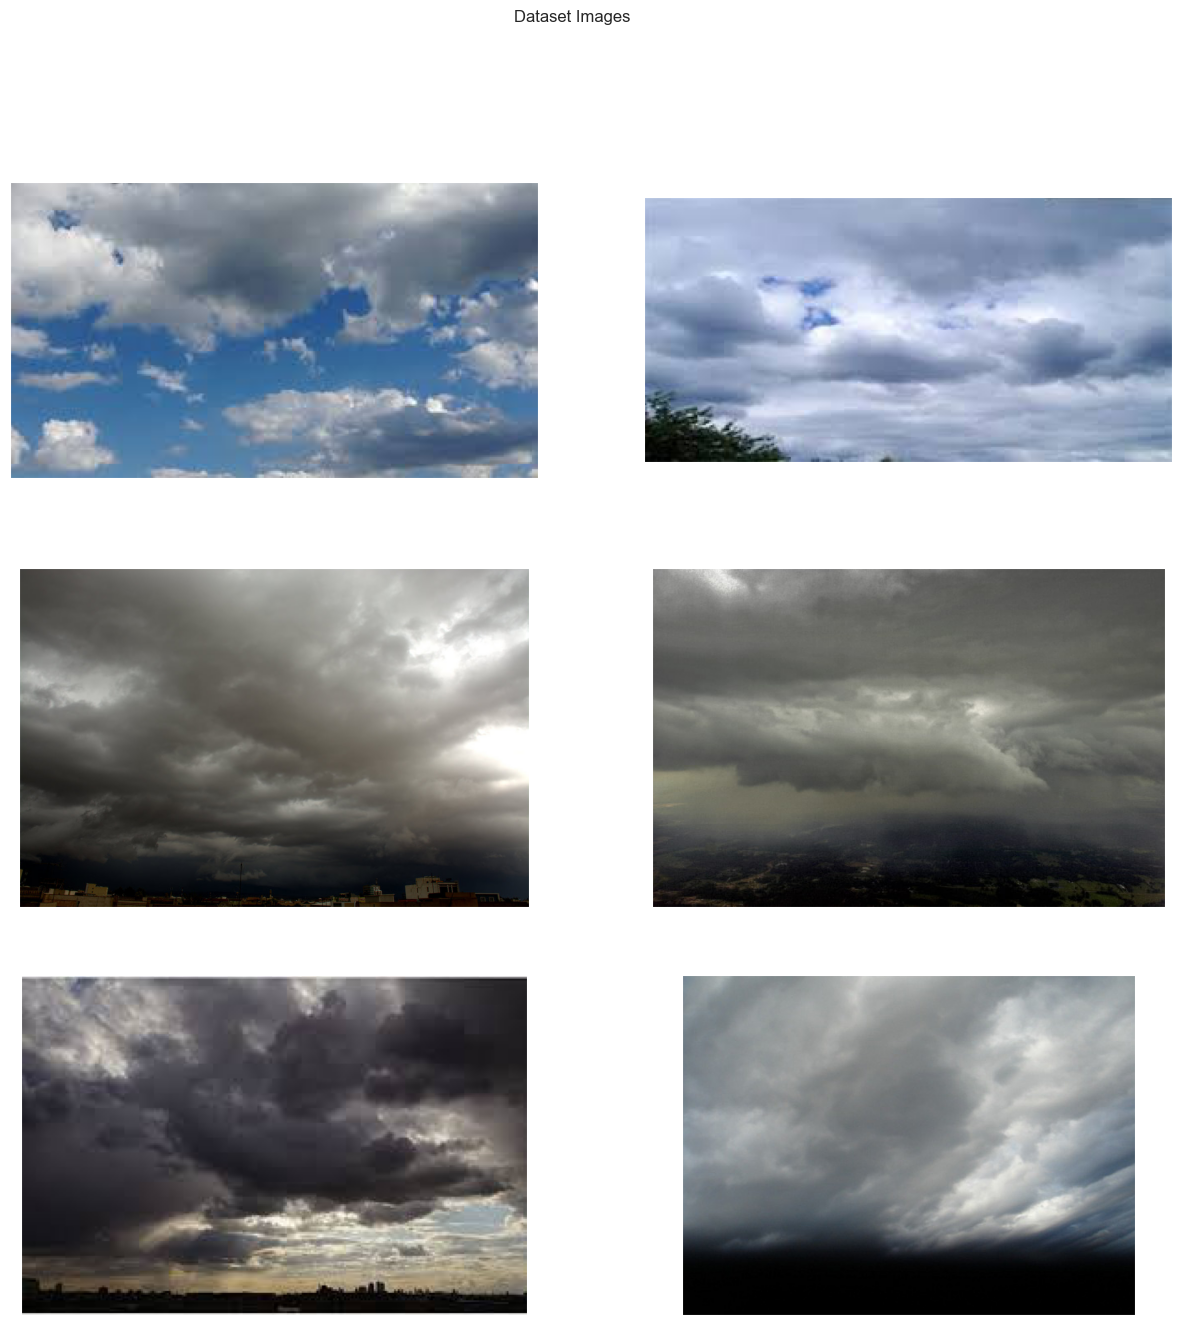

In [2]:
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Dataset Images')
ax = ax.ravel()

#print(fig)
#path = "C:\\Users\\charanya\\Downloads\\Fire_Dataset-2\\Multi-class Weather Dataset\\Cloudy\\cloudy1.jpg"

for i in range(0,6):
    path = "C:\\Users\\charanya\\Downloads\\Fire_Dataset-2\\Multi-class Weather Dataset\\Cloudy\\cloudy"+str(i+25)+".jpg"
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    #print(img)
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [16]:
#create an empty DataFrame
df = pd.DataFrame(columns=['path','label'])

for dirname,dire, filenames in os.walk('C:\\Users\\charanya\\Desktop\\fire_dataset\\fire_images'):
    tmp = []                                  # initialize list
    for filename in filenames:
        tmp.append((pd.DataFrame([[os.path.join(dirname, filename),'Fire']])))
ff1=pd.concat(tmp)  

for dirname,dire, filenames in os.walk("C:\\Users\\charanya\\Downloads\\train_fire"):
    tm = []                                  # initialize list
    for filename in filenames:
        tm.append((pd.DataFrame([[os.path.join(dirname, filename),'Fire']])))    
ff2=pd.concat(tm)

for dirname, _, filenames in os.walk("C:\\Users\\charanya\\Downloads\\1"):
    tm1 = []                                  # initialize list
    for filename in filenames:
        tm1.append((pd.DataFrame([[os.path.join(dirname, filename),'Fire']])))    
ff3=pd.concat(tm1)

for dirname, _, filenames in os.walk('C:\\Users\\charanya\\Desktop\\fire_dataset\\non_fire_images'):
    tmp0 = []                                  # initialize list
    for filename in filenames:
        tmp0.append((pd.DataFrame([[os.path.join(dirname, filename),'Non_Fire']])))
nf1=pd.concat(tmp0) 

for dirname, _, filenames in os.walk("C:\\Users\\charanya\\Downloads\\Fire_Dataset-2\\Multi-class Weather Dataset\\Sunrise"):
    tmp1 = []                                  # initialize list
    for filename in filenames:
        tmp1.append((pd.DataFrame([[os.path.join(dirname, filename),'Non_Fire']])))    
nf2=pd.concat(tmp1)

for dirname, _, filenames in os.walk("C:\\Users\\charanya\\Downloads\\Fire_Dataset-2\\Multi-class Weather Dataset\\Cloudy"):
    tmp2 = []                                  # initialize list
    for filename in filenames:
        tmp2.append((pd.DataFrame([[os.path.join(dirname, filename),'Non_Fire']])))    
nf3=pd.concat(tmp2)

for dirname, _, filenames in os.walk("C:\\Users\\charanya\\Downloads\\archive (6)\\dataset\\fogsmog"):
    tmp3 = []                                  # initialize list
    for filename in filenames:
        tmp3.append((pd.DataFrame([[os.path.join(dirname, filename),'Non_Fire']])))    
nf4=pd.concat(tmp3)

for dirname, _, filenames in os.walk("C:\\Users\\charanya\\Downloads\\archive (6)\\dataset\\sandstorm"):
    tmp4 = []                                  # initialize list
    for filename in filenames:
        tmp4.append((pd.DataFrame([[os.path.join(dirname, filename),'Non_Fire']])))    
nf5=pd.concat(tmp4)

for dirname, _, filenames in os.walk("C:\\Users\\charanya\\Desktop\\autumn"):
    tmp5 = []                                  # initialize list
    for filename in filenames:
        tmp5.append((pd.DataFrame([[os.path.join(dirname, filename),'Non_Fire']])))    
nf6=pd.concat(tmp5)

for dirname, _, filenames in os.walk("C:\\Users\\charanya\\Desktop\\autu"):
    tmp6 = []                                  # initialize list
    for filename in filenames:
        tmp6.append((pd.DataFrame([[os.path.join(dirname, filename),'Non_Fire']])))    
nf7=pd.concat(tmp6)

df = pd.concat([ff1,ff2,ff3,nf1,nf2,nf3,nf4,nf5,nf6,nf7])
df = df.rename(columns={0: 'Path', 1: 'Label'})

#shuffle the dataset for redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,Path,Label
0,C:\Users\charanya\Downloads\1\55.jpg,Fire
1,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire
2,C:\Users\charanya\Desktop\fire_dataset\fire_im...,Fire
3,C:\Users\charanya\Desktop\fire_dataset\fire_im...,Fire
4,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire
5,C:\Users\charanya\Desktop\fire_dataset\fire_im...,Fire
6,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire
7,C:\Users\charanya\Desktop\fire_dataset\fire_im...,Fire
8,C:\Users\charanya\Downloads\Fire_Dataset-2\Mul...,Non_Fire
9,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    4383 non-null   object
 1   Label   4383 non-null   object
dtypes: object(2)
memory usage: 68.6+ KB


In [25]:
fig = px.scatter(data_frame = df,x=df.index,y='Label',color='Label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2.5)

In [37]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['Label'].value_counts().index,y=df['Label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['Label'].value_counts().to_numpy(),
     labels=df['Label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

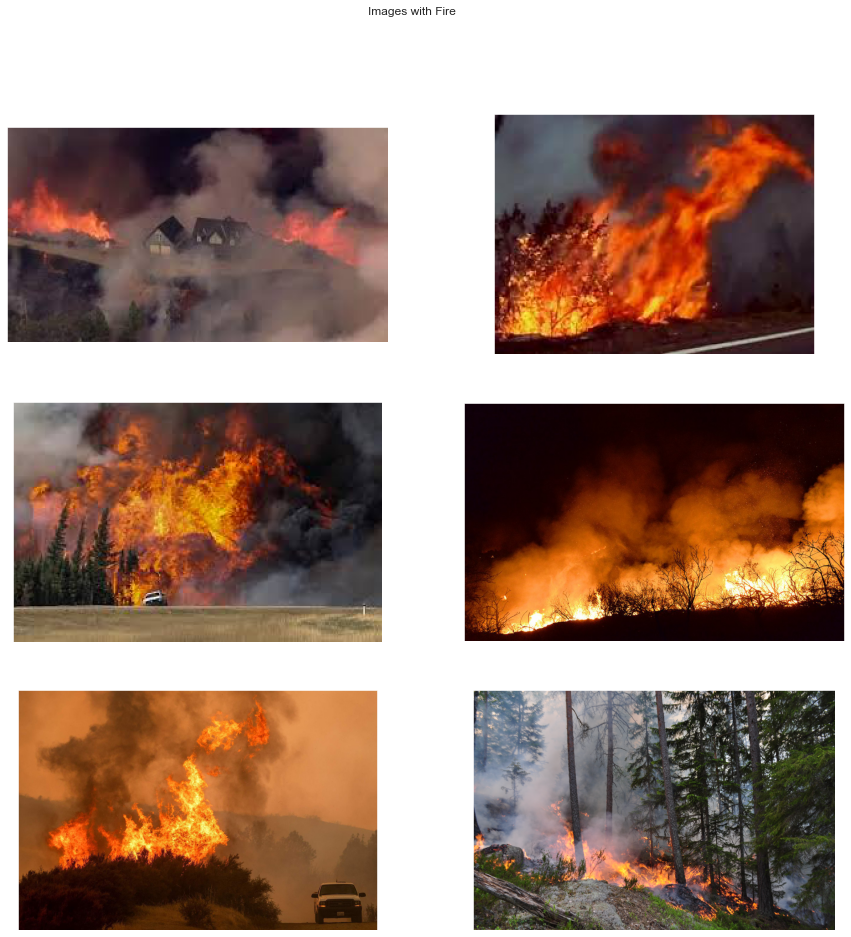

In [38]:
label = 'Fire' #label for images with fire
data = df[df['Label'] == label]
sns.set_style('darkgrid')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'Path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

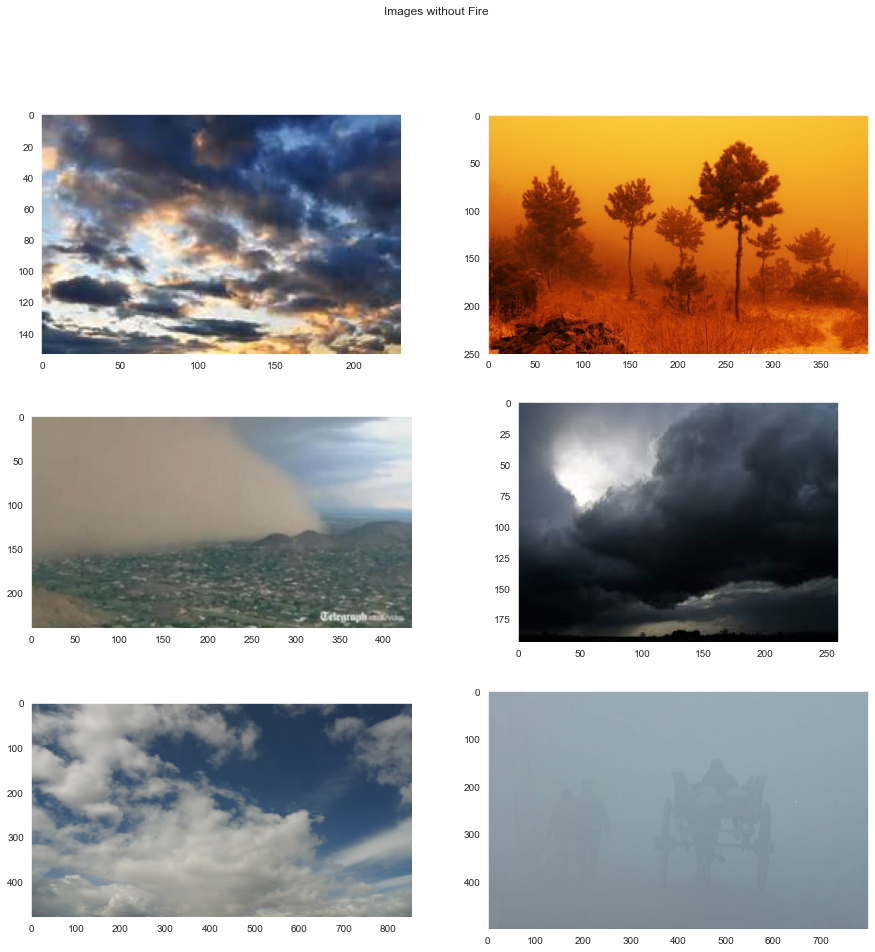

In [39]:
label = 'Non_Fire' #label for images without fire
data = df[df['Label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images without Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'Path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(True)
    ax[i].axes.yaxis.set_visible(True)

In [31]:
def shaper(row):
    shape = image.load_img(row['Path']).size
    row['Height'] = shape[1]
    row['Width'] = shape[0]
    return row
df = df.apply(shaper, axis=1)
df.head(5)


,Path,Label,Height,Width
0,C:\Users\charanya\Downloads\1\55.jpg,Fire,299,447
1,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire,480,892
2,C:\Users\charanya\Desktop\fire_dataset\fire_im...,Fire,676,1024
3,C:\Users\charanya\Desktop\fire_dataset\fire_im...,Fire,1267,1900
4,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire,240,424


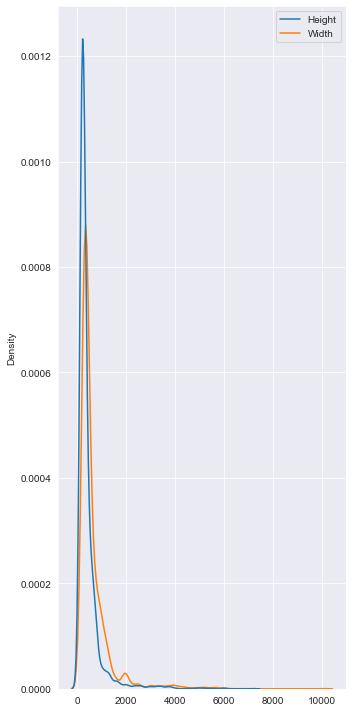

In [41]:
sns.set_style('darkgrid')
fig,(ax1) = plt.subplots(figsize=(5,10))
sns.kdeplot(data=df.drop(columns=['Path','Label']),ax=ax1)

plt.tight_layout()

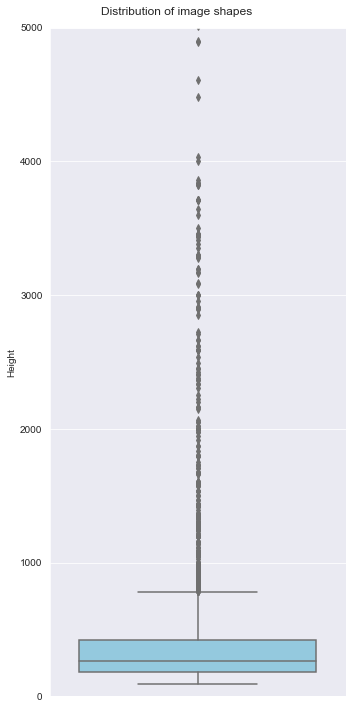

In [42]:
fig,(ax2) = plt.subplots(figsize=(5,10))
sns.boxplot(data=df,y='Height',color='skyblue',ax=ax2)

plt.suptitle('Distribution of image shapes')
#ax3.set_ylim(0,7000)
ax2.set_ylim(0,5000)

plt.tight_layout()

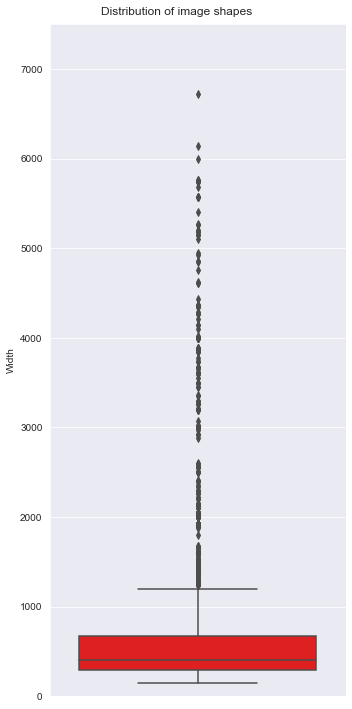

In [43]:
fig,(ax1) = plt.subplots(figsize=(5,10))
sns.boxplot(data=df,y='Width',color='red',ax=ax1)

plt.suptitle('Distribution of image shapes')
#ax3.set_ylim(0,7000)
ax1.set_ylim(0,7500)

plt.tight_layout()

In [44]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

In [45]:
df.head()

,Path,Label,Height,Width
0,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire,300,400
1,C:\Users\charanya\Downloads\train_fire\fire-15...,Fire,135,372
2,C:\Users\charanya\Desktop\fire_dataset\non_fir...,Non_Fire,480,769
3,C:\Users\charanya\Downloads\archive (6)\datase...,Non_Fire,261,400
4,C:\Users\charanya\Downloads\train_fire\fire-82...,Fire,183,275


In [46]:
train_gen = generator.flow_from_dataframe(df,x_col='Path',y_col='Label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='Path',y_col='Label',images_size=(256,256),class_mode='binary',subset='validation')

Found 3507 validated image filenames belonging to 2 classes.
Found 876 validated image filenames belonging to 2 classes.


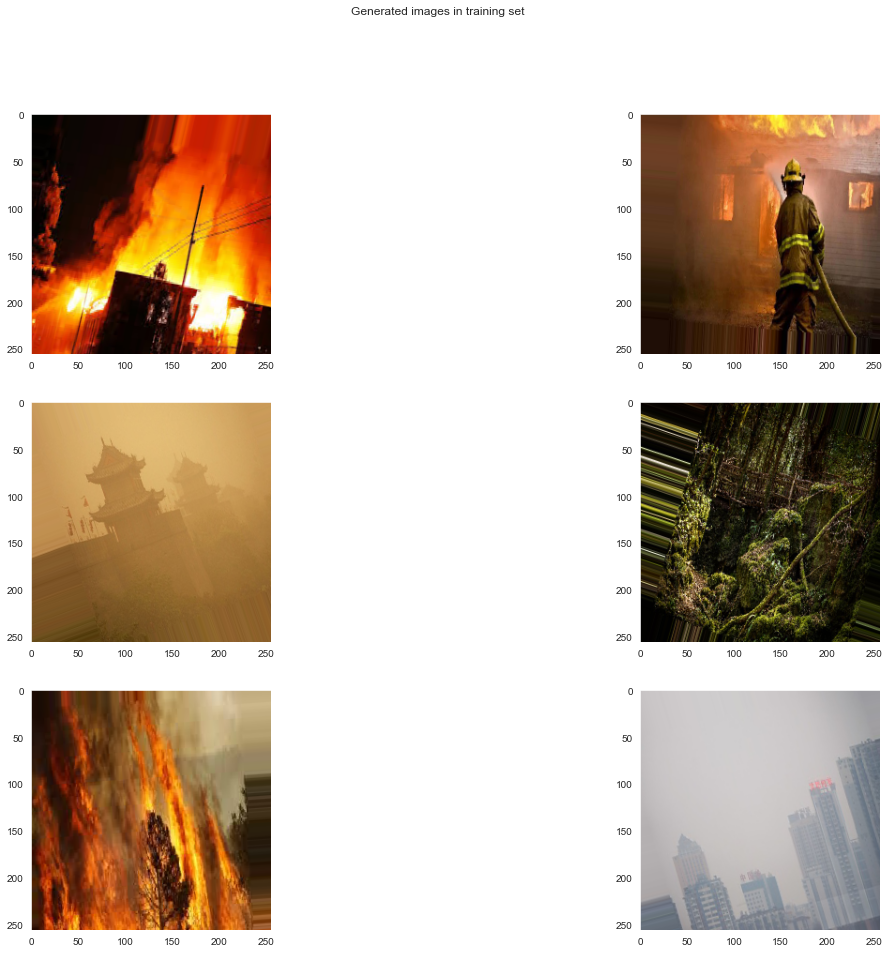

In [47]:
sns.set_style('dark')
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(20,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(True)
    ax[i].axes.yaxis.set_visible(True)

In [48]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'Fire', 1: 'Non_Fire'}


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [50]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 128)     

In [52]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model


In [53]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [55]:
early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)

In [56]:
model.fit(x=train_gen,batch_size=32,epochs=15,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])


Epoch 1/15
110/110 [==============================] - 174s 2s/step - loss: 0.4996 - accuracy: 0.7645 - recall_1: 0.8225 - auc_1: 0.8401 - val_loss: 0.3698 - val_accuracy: 0.8368 - val_recall_1: 0.8178 - val_auc_1: 0.9191 - lr: 0.0010
Epoch 2/15
110/110 [==============================] - 173s 2s/step - loss: 0.3484 - accuracy: 0.8523 - recall_1: 0.8632 - auc_1: 0.9222 - val_loss: 0.2945 - val_accuracy: 0.8676 - val_recall_1: 0.8120 - val_auc_1: 0.9563 - lr: 0.0010
Epoch 3/15
110/110 [==============================] - 177s 2s/step - loss: 0.2998 - accuracy: 0.8754 - recall_1: 0.8885 - auc_1: 0.9429 - val_loss: 0.3547 - val_accuracy: 0.8710 - val_recall_1: 0.9612 - val_auc_1: 0.9423 - lr: 0.0010
Epoch 4/15
110/110 [==============================] - 144s 1s/step - loss: 0.2591 - accuracy: 0.8996 - recall_1: 0.9153 - auc_1: 0.9557 - val_loss: 0.2867 - val_accuracy: 0.8927 - val_recall_1: 0.9651 - val_auc_1: 0.9559 - lr: 0.0010
Epoch 5/15
110/110 [==============================] - 129s 1s/st

In [57]:
history= model.history.history
px.line(history,title = "Metrics Plot")

In [58]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

28/28 [==============================] - 17s 622ms/step - loss: 0.1527 - accuracy: 0.9429 - recall_1: 0.9477 - auc_1: 0.9859
loss: 0.15
accuracy: 0.94
recall_1: 0.95
auc_1: 0.99


In [59]:
from keras.models import load_model
model.save("network.h5")

#model12 = load_model("network.h5")

In [60]:
# Read the video from specified path
cam = cv2.VideoCapture("C:\\Users\\charanya\\Desktop\\WhatsApp Video 2022-08-19 at 11.17.59 PM.mp4")
  
try:
      
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
temp=0
cf=0
while(temp==0 and cf==0):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
  
        # writing the extracted images
        cv2.imwrite(name, frame)
        
        
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
        if(currentframe>300):
            cf=1
        img = image.load_img(name)
        img = image.img_to_array(img)/255
        img = tf.image.resize(img,(256,256))
        img = tf.expand_dims(img,axis=0)
        prediction = int(tf.round(model.predict(x=img)).numpy()[0][0])
        #print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])
        #print("Image Shape",img.shape)
        #prediction=0
        if(prediction==0):
            temp=1
            print("Fire!!")
            break
    else:
        break
if(temp==0):
        print("Non-Fire!")

1/1 [==============================] - 0s 21ms/step
Non-Fire!
